# These are codes to plot DLS measurement data

In [1]:
# Inport of necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact

In [24]:
# Input of Data
input('Select the data sheet and Copy to clipboad.\nInput Enter if finished')
raw_data = pd.read_clipboard(sep='\t')
raw_data

Select the data sheet and Copy to clipboad.
Input Enter if finished


,Measurement Date and Time,Intensity Mean (d.nm),Number Mean (d.nm),Volume Mean (d.nm),PdI,Sizes[1] (d.nm),Sizes[2] (d.nm),Sizes[3] (d.nm),Sizes[4] (d.nm),Sizes[5] (d.nm),...,Volumes[61] (%),Volumes[62] (%),Volumes[63] (%),Volumes[64] (%),Volumes[65] (%),Volumes[66] (%),Volumes[67] (%),Volumes[68] (%),Volumes[69] (%),Volumes[70] (%)
0,17/12/2018 16:31,311.30,310.1000,314.7000,0.890,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,17/12/2018 16:39,1840.00,0.6897,0.8344,0.033,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,17/12/2018 16:49,228.80,228.1000,230.9000,0.936,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,17/12/2018 16:56,87.43,85.5900,86.9500,1.000,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,17/12/2018 17:02,256.80,254.6000,259.3000,0.880,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
5,17/12/2018 17:25,76.65,16.1100,23.4500,0.154,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
6,17/12/2018 17:32,85.03,38.2700,50.3000,0.234,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,17/12/2018 17:37,272.80,7.2350,159.2000,0.424,0.4,0.4632,0.5365,0.6213,0.7195,...,0.1,0.2,0.4,0.6,0.8,0.7,0.2,0,0,0
8,17/12/2018 17:46,657.70,72.8300,738.6000,0.587,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9,17/12/2018 18:07,251.30,20.1100,1030.0000,0.314,0.4,0.4632,0.5365,0.6213,0.7195,...,0.0,0.0,0.4,2.1,6.1,7.3,3.0,0,0,0


## Making of measurement time series

In [25]:
# Extraction of measurement time data
s = int(input('From which row?'))
f = int(input('To which row?'))
raw_time = raw_data.loc[s:f, 'Measurement Date and Time']# extraction from raw data
raw_time.index = range(1,f-s+2)# set index from 1 

#conversion to timedelta
time_extracted = pd.DataFrame()
time_extracted = pd.to_datetime(raw_time, format="%d/%m/%Y %H:%M")

# Conversion to hours
measurement_time_h = pd.DataFrame(np.arange(f-s+1), dtype=float)
d0 = time_extracted[1].day    #day was corrected to month
h0 = time_extracted[1].hour
m0 = time_extracted[1].minute
for i in range(f-s+1):
    dx = time_extracted[i+1].day     #day was corrected to month
    hx = time_extracted[i+1].hour
    mx = time_extracted[i+1].minute
    dd = dx - d0
    hd = hx - h0
    md = mx - m0
    timeh = (dd * 24) + hd + (md/60)
    measurement_time_h.iat[i,0] = timeh
measurement_time_h.index = range(1,f-s+2)
measurement_time_h

From which row?1
To which row?15


,0
1,0.000000
2,0.166667
3,0.283333
4,0.383333
5,0.766667
6,0.883333
7,0.966667
8,1.116667
9,1.466667
10,1.683333


## Plotting of number mean change

In [17]:
# preparation of number mean series
number_mean = raw_data.loc[s:f, 'Number Mean (d.nm)']
number_mean.index = range(1,f-s+2)
max = number_mean.max()
def plotting(title, legend, color, y_lim, logalithmic):
    # creation of a space for graph 
    plt.style.use('default')
    plt.figure(1, figsize=(10,6))
    plt.clf()
    # plotting
    plt.plot(measurement_time_h,
         number_mean,
         marker='.',
         linewidth=2,
         markersize=10,
         label=legend, 
         color=color)
    # Edit plot setting
    plt.xlabel('Measurement time (h)', fontsize=20)
    plt.ylabel('Number mean (d.nm)', fontsize=20)
    plt.tick_params(labelsize = 15)
    plt.legend(fontsize=20)
    plt.xlim([0,21])
    
    if logalithmic==True:
        plt.yscale('log')
        plt.ylim([1,y_lim])
    else:
        plt.ylim([0,y_lim])
    
    plt.title(title, fontsize=30)
    plt.show()
interact(plotting, title='', legend='scavenger2 1:x (xeq of bix)', 
         color=['red','blue','green','purple','black'], y_lim=(1.1*max,1000,10), logalithmic=False)

interactive(children=(Text(value='', description='title'), Text(value='scavenger2 1:x (xeq of bix)', descripti…

<function __main__.plotting(title, legend, color, y_lim, logalithmic)>

## Size distributions in ingredient MOP solutions

In [26]:
DF1 = pd.DataFrame(np.arange(70))
sizes = pd.DataFrame(raw_data.loc[1,'Sizes[1] (d.nm)':'Sizes[70] (d.nm)'],dtype=float)
sizes.index=range(70)
DF1[0] = sizes

def plotting(legend1,row1,color1,  legend2, row2,  color2, title):
    numbers = pd.DataFrame(raw_data.loc[row1,'Numbers[1] (%)':'Numbers[70] (%)'], dtype=float)
    numbers.index=range(70)
    DF1[1] = numbers
    numbers = pd.DataFrame(raw_data.loc[row2,'Numbers[1] (%)':'Numbers[70] (%)'], dtype=float)
    numbers.index=range(70)
    DF1[2] = numbers
    plotting
    plt.style.use('default')
    plt.figure(1)
    plt.clf()
    plt.plot(DF1[0],DF1[1],marker='.',linewidth=1,markersize=2,label=legend1,color=color1)   
    plt.plot(DF1[0],DF1[2],marker='.',linewidth=1,markersize=2,label=legend2,color=color2)   
    plt.xscale('log')
    plt.xlabel('Sizes(d.nm)', fontsize=20)
    plt.ylabel('Numbers(%)', fontsize=20)
    plt.tick_params(labelsize = 15)
    plt.title(title, fontsize=20)
    plt.grid(which='major',color='gray',linestyle=':')
    plt.legend(fontsize=12)
    
    plt.show(1)
interact(plotting, legend1='bare MOP solution', row1=np.arange(0,f+1), color1=['green','purple','red','blue','black'],
         legend2='kinetically trapped MOP solution', row2=np.arange(0,f+1), color2=['purple','green','red','blue','black'],
         title='')

interactive(children=(Text(value='bare MOP solution', description='legend1'), Dropdown(description='row1', opt…

<function __main__.plotting(legend1, row1, color1, legend2, row2, color2, title)>

## Trace size distribution using slider 

In [68]:
DF1 = pd.DataFrame(np.arange(70))
sizes = pd.DataFrame(raw_data.loc[1,'Sizes[1] (d.nm)':'Sizes[70] (d.nm)'],dtype=float)
sizes.index=range(70)
DF1[0] = sizes

def plotting(legend,row,color,title,y_lim):
    numbers = pd.DataFrame(raw_data.loc[row,'Numbers[1] (Percent)':'Numbers[70] (Percent)'], dtype=float)
    numbers.index=range(70)
    DF1[1] = numbers
    plt.style.use('default')
    plt.figure(1)
    plt.clf()
    plt.plot(DF1[0],DF1[1],marker='.',linewidth=1,markersize=2,label=legend,color=color)   
    plt.xscale('log')
    plt.xlabel('Sizes(d.nm)')
    plt.ylabel('Numbers(%)') 
    plt.title(title)
    plt.grid(which='major',color='gray',linestyle=':')
    plt.legend()
    plt.ylim(0,y_lim)
    plt.show(1)
    
interact(plotting, legend='legend', row=(1,f), color=['green','purple','red','blue','black'], title='',y_lim=(0,100))

interactive(children=(Text(value='legend', description='legend'), IntSlider(value=52, description='row', max=1…

<function __main__.plotting(legend, row, color, title, y_lim)>

# Plotting of successive size distribution data

row starts from? 10
end at? 14
Graph title? sample1_3floor_25degC_countrate230


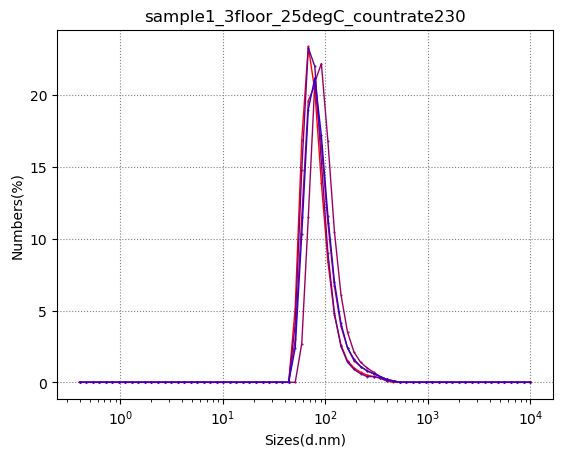

In [22]:
#extraction of data
s_line = int(input('row starts from? ')) 
f_line = int(input('end at? ')) 
n = f_line - s_line + 1 # n is number of distribution data

dist = pd.DataFrame(np.arange(70*(n+1)).reshape((70,(n+1)))) 
sizev = pd.DataFrame(raw_data.loc[0,'Sizes[1] (d.nm)':'Sizes[70] (d.nm)'], dtype=float) 
sizev.index=range(70)
dist[0] = sizev

for i in range(n): 
    numberv = pd.DataFrame(raw_data.loc[s_line+i,'Numbers[1] (%)':'Numbers[70] (%)'], dtype=float) 
    numberv.index=range(70) 
    dist[i+1] = numberv

#plotting
plt.style.use('default')
plt.figure(1)
plt.clf() 
for j in range(n): 
    ce = (1/n)*j #color
    col_b2r=[1-ce,0,ce] 
    plt.plot(dist[0], dist[j+1], marker='.',linewidth=1, markersize=1, color=col_b2r)

plt.xscale('log') 
plt.grid(which='major',color='gray',linestyle=':')
plt.ylabel('Numbers(%)') 
plt.xlabel('Sizes(d.nm)') 
plt.title(input('Graph title? '))

plt.show()